## Below is a brief report on training models using Bag-of-Words (BOW), Term Frequency-Inverse Document Frequency (TF-IDF), and Word2Vec techniques on an IMDb dataset.

### Downloded dataset from IMDB 
* The IMDb dataset consists of movie reviews labeled with sentiment (positive or negative)
* Each review is represented as a text document.

### APPLICATIONS OF NLP (Natural Language Processing)

### Chatbots and Virtual Assistants:
*  NLP powers chatbots and virtual assistants like Siri and Alexa, enabling them to understand and respond to human language queries and commands.


### Sentiment Analysis: 
* NLP helps analyze text data to determine sentiment, such as whether a review is positive or negative. This is useful for understanding customer opinions, social media monitoring, and brand reputation management.


### Language Translation:
* NLP is used in translation tools like Google Translate to convert text from one language to another, making it easier for people who speak different languages to communicate.


### Text Summarization:
* NLP algorithms can automatically summarize large amounts of text, condensing it into shorter, more manageable summaries. This is useful for quickly extracting key information from lengthy documents or articles.


### Grammar Checkers:
* Grammar and spelling is a very important factor while writing professional reports for your superiors even assignments for your lecturers. After all, having major errors may get you fired or failed! That’s why grammar and spell checkers are a very important tool for any professional writer. They can not only correct grammar and check spellings but also suggest better synonyms and improve the overall readability of your content. And guess what, they utilize natural language processing to provide the best possible piece of writing! The NLP algorithm is trained on millions of sentences to understand the correct format. That is why it can suggest the correct verb tense, a better synonym, or a clearer sentence structure than what you have written. Some of the most popular grammar checkers that use NLP include Grammarly, WhiteSmoke, ProWritingAid, etc.

In [1]:
import numpy as np
import pandas as pd
import os

## the current working directory

In [2]:
os.getcwd() 

'C:\\Users\\solmo\\solmon\\NLP PROJECT'

### Changing working directory

In [3]:
os.chdir("D:\data sets")

### Load the data by using pandas

In [4]:
data = "D:\\data sets\\archive (2).zip"
df = pd.read_csv(data)
movie_reviews = pd.DataFrame(df)
print(movie_reviews)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


### INFORMATION OF DATA 

* using info()  function in pandas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.shape

(50000, 2)

In [7]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [8]:
# Looking for one review example
movie_reviews['review'].loc[200]

"Interesting and short television movie describes some of the machinations surrounding Jay Leno's replacing Carson as host of the Tonight Show. Film is currently very topical given the public drama surrounding Conan O'Brien and Jay Leno.<br /><br />The film does a good job of sparking viewers' interest in the events and showing some of the concerns of the stakeholders, particularly of the NBC executives. The portrayal of Ovitz was particularly compelling and interesting, I thought.<br /><br />Still, many of the characters were only very briefly limned or touched upon, and some of the acting seemed perfunctory. Nevertheless, an interesting story."

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='sentiment', ylabel='count'>

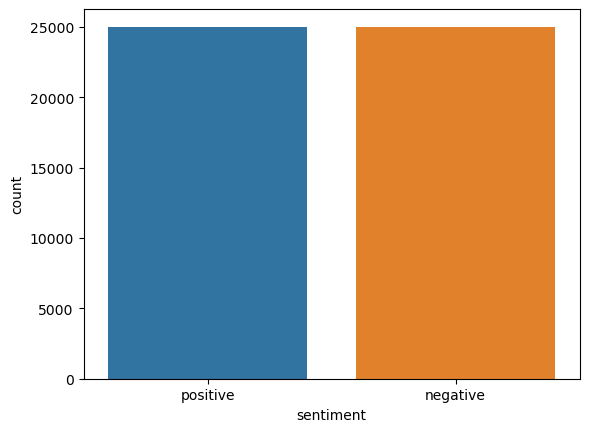

In [10]:
sns.countplot(x='sentiment',data=movie_reviews)

In [11]:
def no_of_words(text):
    words = text.split()
    words_count = len(words)
    return words_count

df["words_count"] = df["review"].apply(no_of_words)
df.head()

review sentiment  words_count
0  One of the other reviewers has mentioned that ...  positive          307
1  A wonderful little production. <br /><br />The...  positive          162
2  I thought this was a wonderful way to spend ti...  positive          166
3  Basically there's a family where a little boy ...  negative          138
4  Petter Mattei's "Love in the Time of Money" is...  positive          230

### CHANGING WORDS TO NUMBER IN SENTIMENT ANALYSIS

In [12]:
df.sentiment.replace("negative",0,inplace = True)
df.sentiment.replace("positive",1,inplace = True)

In [13]:
df.head()

review  sentiment  words_count
0  One of the other reviewers has mentioned that ...          1          307
1  A wonderful little production. <br /><br />The...          1          162
2  I thought this was a wonderful way to spend ti...          1          166
3  Basically there's a family where a little boy ...          0          138
4  Petter Mattei's "Love in the Time of Money" is...          1          230

## TEXT PREPROCESSING

### CONVERT UPPER CASE TO LOWER CASE 


* Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words.

After using the lower casing, all three words are treated as a single word that is nlp.

### REMOVING HTML TAGS
This is the second essential preprocessing technique. The chances to get HTML tags in our text data is quite common when we are extracting or scraping data from different websites.

We don't get any valuable information from these HTML tags. So it is better to remove them from our text data. We can remove these tags by using regex and we can also use the BeautifulSoup module from bs4 libraries.

Let us see the implementation using python.

HTML tags removal Implementation using regex module

#### Removal of URLs
* URL is the short-form of Uniform Resource Locator. The URLs within the text refer to the location of another website or anything else.

If we are performing any website backlinks analysis, twitter or Facebook in that case, URLs are an excellent choice to keep in text.

Otherwise, from URLs also we can not get any information. So we can remove it from our text. We can remove URLs from the text by using the python Regex library

#### Removing Numbers
* We can remove numbers from the text if our problem statement doesn't require numbers.

For example, if we are working on financial related problems like banking or insurance-related sectors. We may get information from numbers.

In those cases, we shouldn't remove numbers.

#### Removal of Emojis
* In today's online communication, emojis play a very crucial role.

Emojis are small images. Users use these emojis to express their present feelings. We can communicate these with anyone globally. For some problem statements, we need to remove emojis from the text.

#### Removal of emotions
* Emojis and emoticons are both different. An emoticon portrays a human facial expression using just keyboard characters, such as letters, numbers, and punctuation marks.

This is also the same as emojis; if problem statements don't require emoticons, we can remove them

#### Removing of Punctuations or Special Characters
* Punctuations or special characters are all characters except digits and alphabets. List of all available special characters are [!"#$%&'()*+,-./:;<=>?@[]^_`{|}~].

This is better to remove or convert emoticons before removing punctuations or special characters.

#### Removing of Stopwords
* Stopwords are common words and irrelevant words from which we can't get any useful information for our model or problem statement.

Few stopwords are "a", "an", "the", etc

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Stop words in English
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import re
import string
def clean_text(text):
    text  = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # remove url
    text = re.sub(r'https?://\S+|www\.\S+', repl=' ', string=text)
    # remove numbers
    text = re.sub(r'\d+',repl=" ", string=text)
    # remove punctuation
    text =  re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # removing break tags
    text = re.sub('<br />','',text)
     # Remove leading, trailing, and multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove emojis 
    text = re.sub(r'[^\w\s,]', '', text)
    # Remove emoticons 
    text = re.sub(r'[:;]-?[\)\(D]', '', text)
    # removing stop words
    tokens = word_tokenize(text)
    filtered_sentence = [word for word in tokens if not word in stop_words]
    return " ".join(filtered_sentence)
   
 
    
   
    
df["clean_data"] = df["review"].apply(clean_text)


In [16]:
print(df["clean_data"])

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: clean_data, Length: 50000, dtype: object


In [17]:
duplicated_count = df.duplicated().sum()
print("number of duplicated: ",duplicated_count)

number of duplicated:  418


In [18]:
# removing duplicate words
remove_duplictaes = df.drop_duplicates("review")


## STEMMING

In [19]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# initialize porter stemmer object
stemmer = PorterStemmer()
def porter_stemmer(text):
    #word tokenization
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        #stem word to each word
        stem_word = stemmer.stem(tokens[index])
        # update tokens list with stem word
        tokens[index] = stem_word
        # join list with space separator as string
    return " ".join(tokens)
        
Stemming = df["clean_data"].apply(porter_stemmer)

## Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer
# initialize lemmatizer object
lemma = WordNetLemmatizer()
def lemmatization(text):
    # word tokenization
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word
        return " ".join(tokens)
    
lemmatization = df["clean_data"].apply(lemmatization)

In [21]:
df["words_count"] = df["clean_data"].apply(no_of_words)

In [22]:
df.head()

review  sentiment  words_count  \
0  One of the other reviewers has mentioned that ...          1          167   
1  A wonderful little production. <br /><br />The...          1           84   
2  I thought this was a wonderful way to spend ti...          1           85   
3  Basically there's a family where a little boy ...          0           66   
4  Petter Mattei's "Love in the Time of Money" is...          1          125   

                                          clean_data  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...

In [23]:
# separeate positive review
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  words_count  \
0  One of the other reviewers has mentioned that ...          1          167   
1  A wonderful little production. <br /><br />The...          1           84   
2  I thought this was a wonderful way to spend ti...          1           85   
4  Petter Mattei's "Love in the Time of Money" is...          1          125   
5  Probably my all-time favorite movie, a story o...          1           56   

                                          clean_data  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
4  petter matteis love time money visually stunni...  
5  probably alltime favorite movie story selfless...

In [24]:
import wordcloud


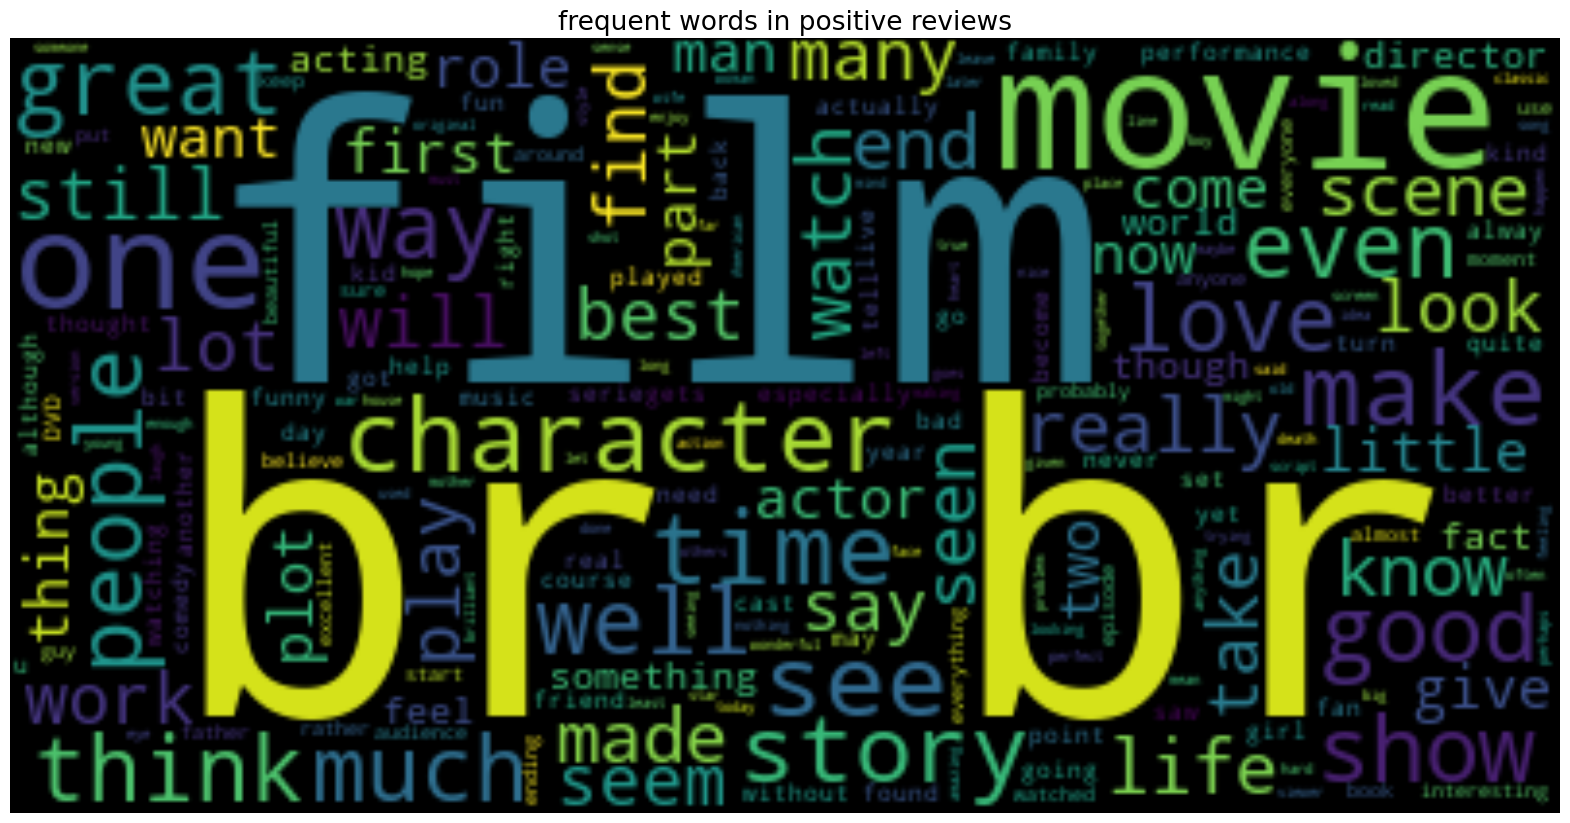

In [25]:
# visulizaion of worldcould
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = " ".join([i for i in pos_reviews['review']])
plt.figure(figsize = (20,15),facecolor = 'None')
word_cloud = WordCloud(max_words = 500,width=400, height=200).generate(data)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')
plt.title("frequent words in positive reviews",fontsize = 19)
plt.show()

In [26]:
import numpy as np
from collections import Counter
count = Counter()
for data in pos_reviews['review'].values:
    for word in data.split():
        count[word] = count[word] + 1
count.most_common(10)

[('the', 291927),
 ('and', 165943),
 ('a', 155775),
 ('of', 149178),
 ('to', 128343),
 ('is', 108168),
 ('in', 90427),
 ('that', 62449),
 ('I', 62223),
 ('it', 53378)]

In [27]:
pos_words = pd.DataFrame(count.most_common(10))
pos_words.columns = ['word','count']
pos_words.head()

word   count
0  the  291927
1  and  165943
2    a  155775
3   of  149178
4   to  128343

In [28]:
import plotly.express as px
px.bar(pos_words,x = 'count', y = 'word',title = "common words in positive", color = 'word')

In [29]:
# separate negative values
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  words_count  \
3   Basically there's a family where a little boy ...          0           66   
7   This show was an amazing, fresh & innovative i...          0           78   
8   Encouraged by the positive comments about this...          0           63   
10  Phil the Alien is one of those quirky films wh...          0           51   
11  I saw this movie when I was about 12 when it c...          0           82   

                                           clean_data  
3   basically theres family little boy jake thinks...  
7   show amazing fresh innovative idea first aired...  
8   encouraged positive comments film looking forw...  
10  phil alien one quirky films humour based aroun...  
11  saw movie came recall scariest scene big bird ...

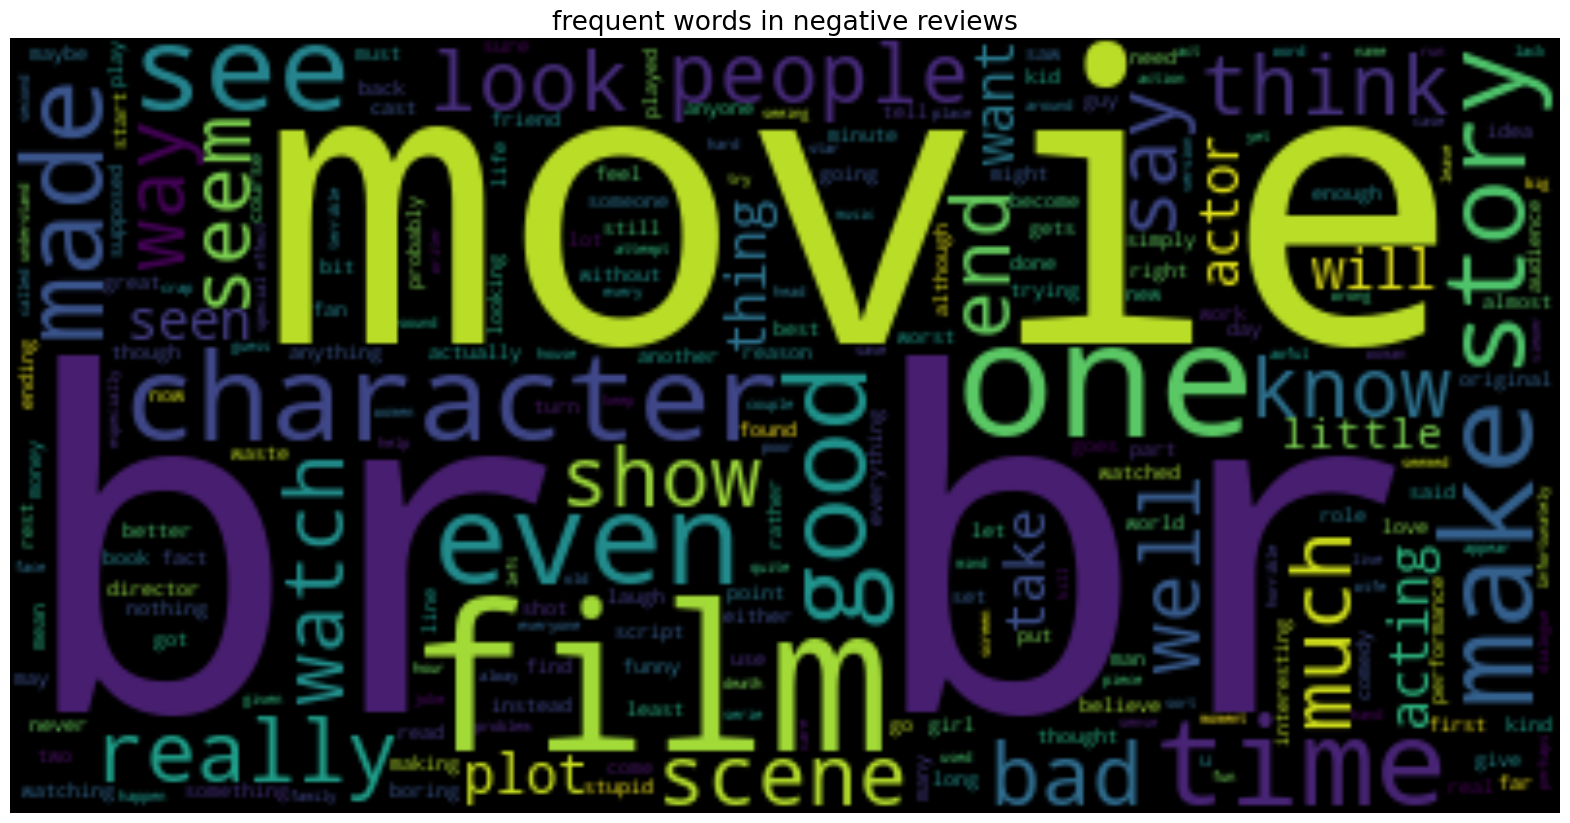

In [30]:
neg_data = " ".join([i for i in neg_reviews['review']])
plt.figure(figsize = (20,15),facecolor = 'None')
word_cloud = WordCloud(max_words = 500,width=400, height=200).generate(neg_data)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')
plt.title("frequent words in negative reviews",fontsize = 19)
plt.show()

In [31]:
count = Counter()
for data in neg_reviews['review'].values:
    for word in data.split():
        count[word] = count[word] + 1
count.most_common(10)

[('the', 276808),
 ('a', 151185),
 ('and', 135976),
 ('of', 134447),
 ('to', 133507),
 ('is', 94888),
 ('in', 79554),
 ('I', 70275),
 ('that', 64369),
 ('this', 62112)]

In [32]:
neg_words = pd.DataFrame(count.most_common(10))
neg_words.columns = ['word','count']
neg_words.head()

word   count
0  the  276808
1    a  151185
2  and  135976
3   of  134447
4   to  133507

In [33]:
px.bar(neg_words,x = 'count',y = 'word',title = "common words in negative",color = 'word')

In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import tensorflow

## BAG OF WORDS 

#### * The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.


In [36]:

from tensorflow.keras.preprocessing.text import Tokenizer
#install Tokenizer
tokenizer = Tokenizer()
def bag_of_words(text):
    data = tokenizer.fit_on_texts(text)
    vocabulary = list(tokenizer.word_index.keys())
    vectors = tokenizer.texts_to_matrix(text, mode='count')
    return text
BOW  = df["clean_data"].apply(bag_of_words)

## PREDICTING BAG OF WORDS

In [37]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer    # change words to number in review column
# Creating a bag of words model
cv = CountVectorizer(max_features=2500)  
x = cv.fit_transform(BOW).toarray()    #array matrix
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
y = pd.get_dummies(movie_reviews['sentiment'])
y = y.iloc[:,1].values
print(y)

[ True  True  True ... False False False]


In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


### Model Selection 
* Navie Bayes
 * navie bayes algorithm is a supervised learning algorithm which is based on bayes theorem and used for solving classification problems
* it is maily used in text classification that includes a high dimensional training data set
* navie bayes classifier is a one of the simple and most effective classification algorithms which helps in building the fast machine learning models that can make quick predictions

In [40]:
from sklearn.naive_bayes import MultinomialNB
text_analysis_model = MultinomialNB().fit(x_train,y_train)
# prediction
y_pred = text_analysis_model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report as cr
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.8368
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      5035
        True       0.84      0.84      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
                                                    
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(x_train, y_train)
# Make predictions on the testing data
predictions = model.predict(x_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
print(cr(y_test,y_pred))

0.8696
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      5035
        True       0.84      0.84      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## TF-IDF(Term frequency-Inverse Document Frequency)

* TF  =  no of words in sentence/total no of words in sentence
* IDF = log(total no of sentence/no of sentence containing that word)
*    TF*IDF

In [44]:
# Creating a TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(BOW).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
y = pd.get_dummies(movie_reviews['sentiment'])
y = y.iloc[:,1].values
print(y)

[ True  True  True ... False False False]


## Navie bayes

 * navie bayes algorithm is a supervised learning algorithm which is based on bayes theorem and used for solving classification problems
* it is maily used in text classification that includes a high dimensional training data set
* navie bayes classifier is a one of the simple and most effective classification algorithms which helps in building the fast machine learning models that can make quick predictions

In [74]:
from sklearn.model_selection import train_test_split

 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from sklearn.naive_bayes import MultinomialNB
text_analysis_model = MultinomialNB().fit(x_train,y_train)
#prediction
y_pred = text_analysis_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report as cr
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.8373
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      5035
        True       0.82      0.86      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



 Logistic regression
* its is supervised machine learning algorithm it deals with only binary classification model like movie reviews is positive or negative
* here positive or negative is binary classification because we are predicted its movie is good or bad 
* we dont solve this problem based on linear regression algorithm because regression model predicit only numerical data its like contunies data and line is linear
* logistic regression line isrange is 0 to 1 to convert sigmoid cure(s-cure) 
* based on Thresholding value it predicit the movie reviews  are positive or negative here thresholding predicit value(p) >= 0.5
  the value greater than 0.5 the movie is positive otherwise negative
* to calculate predicit value based sigmod function

In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
                                                    
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
predictions = model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
print(cr(y_test,y_pred))

0.8776
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      5035
        True       0.82      0.86      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### WORD 2 VEC

In [52]:
import gensim


In [53]:
import re
from gensim.parsing.preprocessing import strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = strip_tags(text)  # Remove tags
    text = strip_punctuation(text)  # Remove punctuation
    text = strip_multiple_whitespaces(text)  # Remove multiple whitespaces
    text = strip_numeric(text)  # Remove numbers
    return text.split()  # Tokenize text

w2v_data_cleaning = df["clean_data"].apply(preprocess_text)


In [54]:
# Sentence words stats
len_count = []
for l in w2v_data_cleaning :
    len_count.append(len(l))

print("Total number of Sentences : ", len(len_count))
word_sent_df = pd.DataFrame(sorted(Counter(len_count).items()), columns=["No of Words in each Sentence","No of sentence"])
word_sent_df.head(10)

Total number of Sentences :  50000


No of Words in each Sentence  No of sentence
0                             3               1
1                             4               3
2                             5               2
3                             6               2
4                             7               4
5                             8               4
6                             9               9
7                            10               5
8                            11               8
9                            12              10

In [55]:
# data after cleaning and preprocessing
print(w2v_data_cleaning[0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream'

In [58]:
# Time calculation
import time
def cal_elapsed_time(s):
    return print("Elapsed time:\t", round((time.time() - s),2))
s_time = time.time()
cal_elapsed_time(s=s_time)

Elapsed time:	 0.0


## TRAIN A MODEL WORD 2 VEC

In [59]:
import time
from gensim.models import Word2Vec
s_time = time.time()
# Train a Word2Vec model
model = Word2Vec(sentences=w2v_data_cleaning , vector_size=100, window=5, min_count=1, workers=4)
# Save model
model.save("word2vec.model")
cal_elapsed_time(s_time)


Elapsed time:	 32.6


In [60]:

# Loading the model
model = Word2Vec.load("word2vec.model")

In [61]:
# Find similar words for efficiency
model.wv.most_similar("efficiency", topn=10)

[('scaled', 0.8373153209686279),
 ('grubby', 0.835149347782135),
 ('firstclass', 0.834062397480011),
 ('hardness', 0.8217138051986694),
 ('erno', 0.8140016198158264),
 ('lensing', 0.8122984170913696),
 ('hebetude', 0.8094815015792847),
 ('scottearly', 0.8074502944946289),
 ('capabilities', 0.8060633540153503),
 ('swelling', 0.8047057390213013)]

In [62]:
# Get vector form of word king
model.wv.get_vector('king')

array([-1.1176512 ,  0.09223021, -0.00839954,  0.40018123, -0.35632   ,
       -2.186204  , -1.227078  ,  1.7384055 ,  1.6751368 , -0.44650936,
       -0.8576608 , -1.4156387 ,  0.8462178 , -1.4736891 , -2.0280294 ,
       -1.6280577 ,  0.11209572, -1.077827  , -0.12301657, -0.33058363,
        0.11012546, -0.5414441 , -1.2466233 ,  0.74349046,  1.4117903 ,
       -1.9382128 , -1.0635812 , -1.5189124 , -2.049326  , -0.39165917,
       -0.04388919, -0.950905  , -0.11105622,  1.7003075 ,  1.028383  ,
        1.0533752 , -0.68025094,  0.2349707 , -1.5630766 ,  0.32242194,
        0.32499656, -1.6975957 , -2.915271  ,  0.09305192,  0.10530528,
        0.06679686,  0.01935043,  0.24673636, -0.87028116,  0.6528583 ,
        0.6169801 , -1.343122  , -2.448065  ,  1.2775574 , -2.3051763 ,
       -0.4229219 ,  0.8792393 , -1.5030322 ,  0.1902171 , -1.385452  ,
        0.02816215,  1.0749333 , -0.1632919 ,  0.13861452, -1.4258946 ,
        1.4491217 ,  0.21249346, -0.09419672, -0.12659141, -0.18

In [63]:
list_king = [-6.1969426e-02, -5.3274435e-01,  7.2475922e-01, -6.4313947e-03,
       -7.8735612e-02, -5.0991398e-01, -2.4811456e+00,  1.0520046e+00,
        1.7468436e+00,  2.3922274e-01,  5.5895835e-01, -1.3672374e+00,
        1.5390817e+00, -1.5825305e+00, -2.6120865e+00, -3.4561193e+00,
       -6.1536485e-01, -1.4237921e+00,  7.7786580e-02, -5.4031841e-02,
        9.0866882e-01,  5.3754425e-01, -1.3728449e+00,  6.8416291e-01,
        3.4546477e-01, -6.0119692e-02, -1.0727392e+00, -1.1602639e+00,
       -7.1692449e-01, -1.1774546e+00, -1.0184386e+00, -1.5545051e+00,
        4.4407880e-01,  8.6303258e-01,  4.7466713e-01, -4.1361281e-01,
       -1.1719082e-01,  9.1936089e-02, -5.6674922e-01, -3.1195620e-01,
       -4.9002311e-01, -1.4300354e+00, -1.2830765e+00,  8.0554587e-01,
        4.1894108e-01, -9.8788448e-02, -9.4056690e-01,  1.1359111e+00,
       -1.5184153e+00,  1.3016145e-01,  1.2428398e+00, -1.6584808e+00,
       -1.4710850e+00,  1.0850860e+00, -1.0607662e+00,  1.7091559e-01,
        1.4930120e+00, -5.2201599e-01,  2.2110979e-01, -9.1316831e-01,
       -3.3938989e-01,  4.2399150e-01, -2.5240162e-03,  7.2416860e-01,
       -2.1190736e+00,  2.2701859e+00, -8.5399956e-01, -9.3928796e-01,
       -1.0274633e+00,  8.8850462e-01,  3.2867458e-01,  6.9392264e-01,
        2.1718775e-01,  1.9535178e-01,  1.1273226e-01,  1.9319915e+00,
        1.6460429e-01, -2.6991580e+00, -1.2739072e+00,  8.3784470e-03,
        1.6927505e+00,  1.4804219e+00, -6.0369045e-01,  3.9229074e-01,
       -3.1200781e-01, -1.6265468e-01,  1.9790055e-01,  1.0182251e+00,
       -1.6910578e-01,  4.0240702e-01, -6.7743450e-01,  7.1913549e-03,
        1.2690084e+00, -9.4317955e-01,  9.6552449e-01,  1.5489526e+00,
       -1.4271456e+00, -1.4814732e+00,  3.5180300e-01, -1.4452424e+00]

In [64]:
len(list_king)

100

In [65]:
# List of word similarity
model.wv.n_similarity(['king','male'],['queen','female'])

0.77789366

In [66]:
# Distance between two words
model.wv.distance('king','queen')

0.4657875895500183

In [67]:
# Similar word for king
model.wv.similar_by_word('king')

[('kings', 0.7752071022987366),
 ('lion', 0.7186645865440369),
 ('emergesno', 0.6944010257720947),
 ('burroughs', 0.6741814613342285),
 ('lear', 0.6715461611747742),
 ('stephen', 0.6707316040992737),
 ('onlywhile', 0.65621018409729),
 ('hong', 0.6558575630187988),
 ('poe', 0.6555513739585876),
 ('rice', 0.6503273248672485)]

In [68]:
import numpy as np

def review_to_avg_vector(review, model):
    # Remove out-of-vocabulary words
    review = [word for word in review if word in model.wv.key_to_index]
    if len(review) == 0:
        return np.zeros(model.vector_size)
    # Compute average vector
    vector = np.mean([model.wv[word] for word in review], axis=0)
    return vector

avg_vectors = [review_to_avg_vector(review, model) for review in w2v_data_cleaning]


In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert labels to numpy array
labels = np.array([1, 0])  # Replace with your actual labels

# Convert avg_vectors to numpy array
avg_vectors = np.array(avg_vectors)

# Check the dimensions
print("Dimensions of avg_vectors:", avg_vectors.shape)
print("Dimensions of labels:", labels.shape)

# Split the dataset into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(avg_vectors, labels, test_size=0.2, random_state=42)
except ValueError as e:
    print("ValueError:", e)


Dimensions of avg_vectors: (50000, 100)
Dimensions of labels: (2,)
ValueError: Found input variables with inconsistent numbers of samples: [50000, 2]


In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
clf = SVC(kernel='linear')  # Linear kernel is often a good choice for text classification

# Fit the model
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


## MODEL TRAINED RESULTS

### Bag-of-Words (BOW):
* navie bayes:  Accuracy = (0.8368) ~ 83%
    
* LogisticRegression: Accuracy = (0.8696) ~ 86%
    


### TF-IDF
* navie bayes: Accuracy =  (0.8373) ~ 83%
* LogisticRegression: Accuracy = (0.8776) ~ 87%

### WORD 2 VEC
* Support vector machine: Accuracy = (0.88) ~ 88%

### Conclusion:
* The Word2Vec-based model achieved the highest accuracy (88), outperforming BOW and TF-IDF models.
* Word2Vec captures semantic meanings better due to its word embedding approach, resulting in improved classification performance

* This brief report summarizes the process and outcomes of training models using Bag-of-Words, TF-IDF, and Word2Vec techniques on the IMDb dataset.